<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/master/pythonProject/SVM/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv('Iris.csv')
label=df['Species'].to_numpy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#drop Id column
#df.drop('Id',axis=1,inplace=True)
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [ ]:
train_set=df.iloc[:,[0,1,2,3]]
#convert to numpy
train_set=train_set.to_numpy()
train_set.shape
# 150 datapoint, each datapoint has 4 features

(150, 4)

In [ ]:
# Reduce dimension into 2 dim and visualize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(100)
def standardized(dataset):
    scaler = StandardScaler()
    scaler.fit(dataset)
    dataset = scaler.transform(dataset)
    return dataset
def pca(data,num):
    pca = PCA(n_components=num) # 95% of variance equal to 330 Principal component
    pca.fit(data)
    data = pca.transform(data)
    print(np.sum(pca.explained_variance_ratio_) )
    return data
def split(data):
    data=np.array(data).T
    x=data[0]
    y=data[1]
    return x,y
def present(x,y):
    plt.plot(x, y, 'o')
def run(x):
    x=standardized(x)
    data=pca(x,2)
    x,y=split(data)
    return data

<Figure size 7200x7200 with 0 Axes>

In [ ]:
data=run(train_set)
data.shape

0.9318211437893082


(150, 2)

In [ ]:
label=label.reshape(150,1)

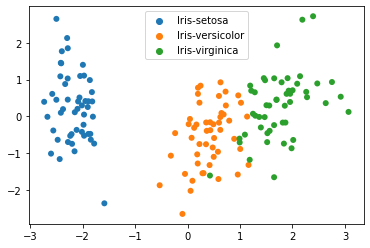

In [ ]:
#add label and visualize
import seaborn as sns
data_label=np.hstack((data,label))
sns.scatterplot(x=data_label[:,0], y=data_label[:,1], hue=data_label[:,2], ec=None)